In [1]:
from utils.binaries import *
from utils.plotting import *
from utils.auger.sd import randoms

18:20:46 (  +798ms) [INFO   ] -- import logging
18:20:46 (  +212ms) [INFO   ] -- import numpy as np
18:20:46 (   +13ms) [INFO   ] -- import uncertainties
18:20:47 (  +634ms) [INFO   ] -- import pandas as pd
18:20:47 (    +2ms) [WARNING] -- pandas support to be dropped at some point!
18:20:47 (    +2ms) [INFO   ] -- import binaries.tools as tools
18:20:47 (  +511ms) [INFO   ] -- import matplotlib.pyplot as plt
18:20:48 (  +863ms) [INFO   ] -- import seaborn as so
18:20:48 (    +6ms) [INFO   ] -- set MONI_PATH = PosixPath('/cr/work/filip/monit_and_sd')
18:20:48 (    +1ms) [INFO   ] -- set HIST_PATH = PosixPath('/cr/work/filip/monit_and_sd')
18:20:48 (    +0ms) [INFO   ] -- set PLOT_PATH = PosixPath('/cr/data01/filip/plots')
18:20:48 (    +1ms) [INFO   ] -- set DATA_PATH = PosixPath('/cr/data01/filip/Data')
18:20:48 (    +1ms) [INFO   ] -- set SCAN_PATH = PosixPath('/cr/data01/filip/xy-calibration')
18:20:48 (    +1ms) [INFO   ] -- set OFLN_PATH = PosixPath('/cr/data01/filip/offline/insta

In [69]:

total_time = 0
px = np.linspace(0, 100, 1001)
pulse_heights = np.zeros(1000)

for station in ['Constanza', 'Nadia', 'NuriaJr', 'Svenja']:
    RandomFiles = randoms.UubRandom(station = station, detectors = "ssd")
    
    for File in tools.ProgressBar(RandomFiles):
        total_time += len(File) * 2048 * 8.33e-9
        indices = np.digitize(np.max(File['trace'], axis=1) / File['mip_peak'], px)
        unique, counts = np.unique(indices, return_counts=True)
        pulse_heights[unique] += counts

    #     break
    # break


tools.pickle_save('pulse_heights_randoms.pkl', np.vstack([0.5 * (px[1:] + px[:-1]), pulse_heights / total_time, np.sqrt(pulse_heights) / total_time]))

1660/1660 [********************] || 00:24:32>00:00:00,         1.13 it/s
1434/1434 [********************] || 00:22:00>00:00:00,         1.09 it/s
801/801 [********************] || 00:12:03>00:00:00,         1.11 it/s
800/800 [********************] || 00:11:06>00:00:00,         1.20 it/s


UUB randoms: uub_randoms_factor = 2.55
Muon acquisition: muon_acquisition_factor = 2.64
Difference: -3.52%


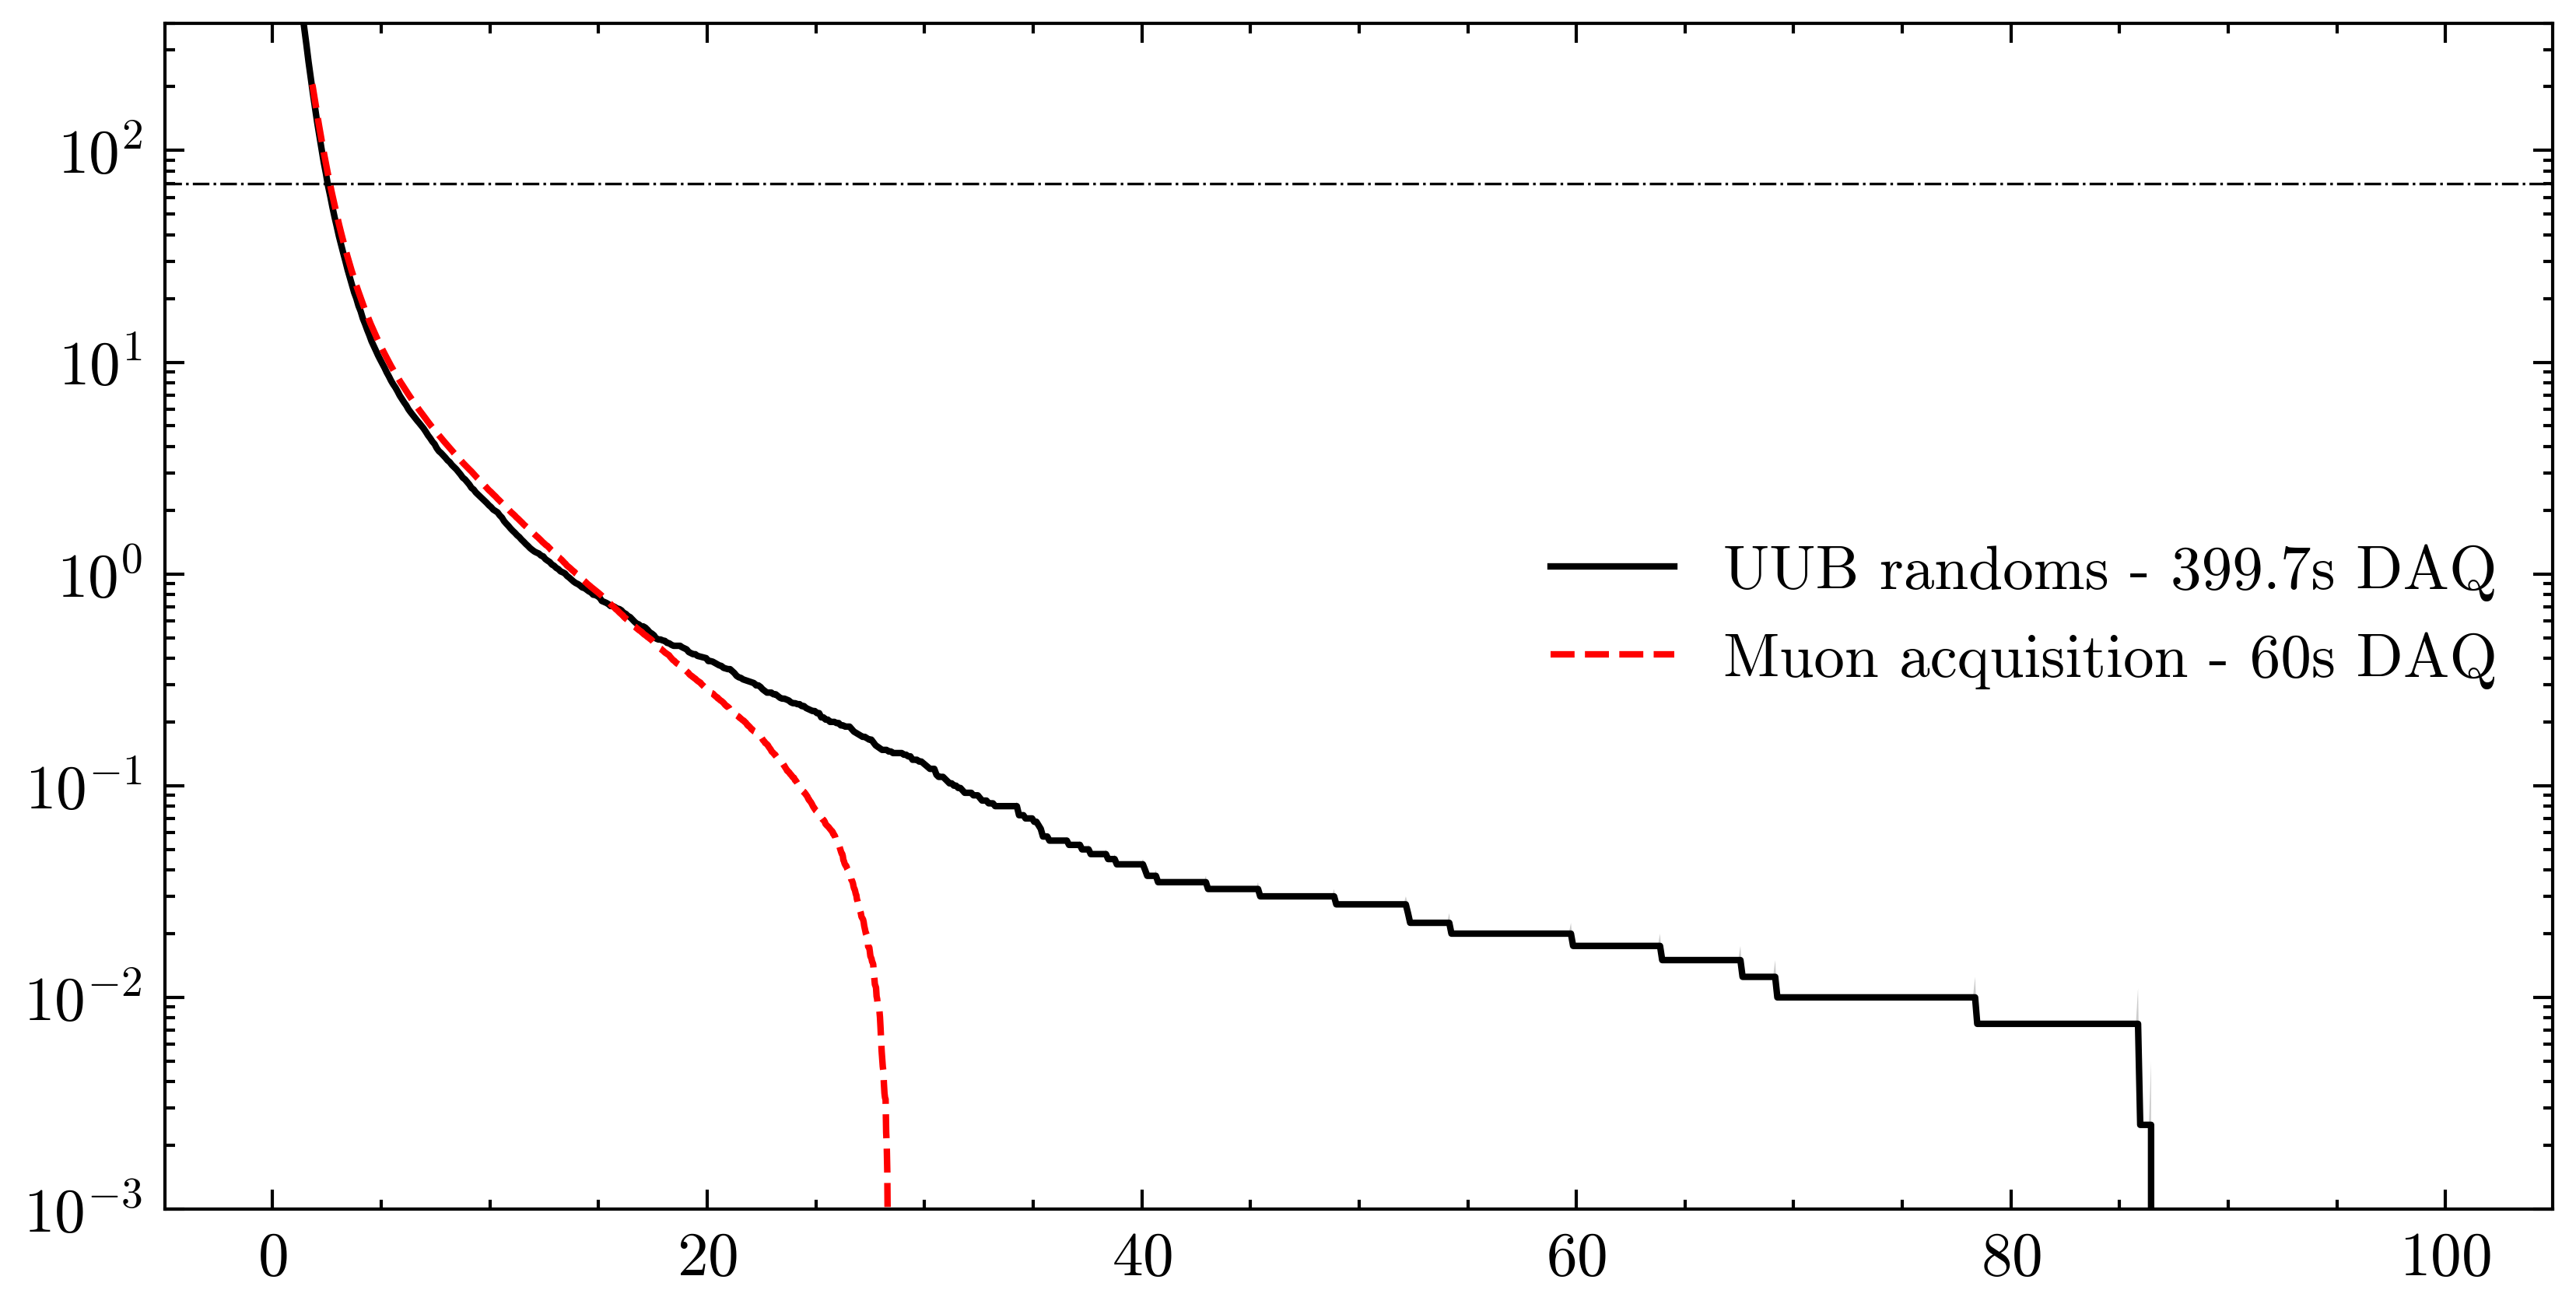

In [75]:
T70Hz_intersect = lambda x, y: x[np.argmin(np.abs(y-70))]

x, y, y_err = tools.pickle_load(f'pulse_heights_randoms.pkl')
y = np.cumsum(y[::-1])[::-1]
plt.plot(x, y, marker='none', label=f'UUB randoms - {total_time:.1f}s DAQ')
plt.fill_between(x, y-y_err, y+y_err, alpha=0.2, edgecolor='none')
uub_randoms_factor = T70Hz_intersect(x, y)
print(f"UUB randoms: {uub_randoms_factor = :.2f}")

x, y = np.loadtxt('/cr/data01/filip/Data/muonAcquisition/mean_rates_t3_mip.txt', unpack=True)
plt.plot(x, y, marker='none', label='Muon acquisition - 60s DAQ')
muon_acquisition_factor = T70Hz_intersect(x, y)
print(f"Muon acquisition: {muon_acquisition_factor = :.2f}")
print(f"Difference: {100*(uub_randoms_factor - muon_acquisition_factor)/muon_acquisition_factor:.2f}%")

plt.axhline(70, ls='-.', lw=0.4)
plt.ylim(1e-3, 4e2)
# plt.xscale('log')
plt.yscale('log')
plt.legend()